# Deep Cell Spots

In [1]:
#gen package
import tifffile as tf
import numpy as np
import pandas as pd
#deep leaning spot detection
from deepcell_spots_detection import find_spots
#enhance figure display
%config InlineBackend.figure_format = 'retina'

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

def plot_2d_locs_on_2d_image(df_locs_2d_1, df_locs_2d_2, img_2d,add_trace = True, zmax=1000):
    
    #For Plotting 2d image
    #-------------------------------------------
    fig = px.imshow(
        img_2d,
        width=700,
        height=700,
        binary_string=True,
        binary_compression_level=4,
        binary_backend='pil',
        zmax = zmax
    )
    #-------------------------------------------
    
    #For Plotting 2d dots
    #-------------------------------------------
    fig.add_trace(go.Scattergl(
        x=df_locs_2d_1.x,
        y=df_locs_2d_1.y,
        mode='markers',
        marker_symbol='cross',
        marker=dict(
            #maxdisplayed=1000,
            size=4
            ),
        name = "Gaussian"
        )
    )
    if add_trace == True:
        fig.add_trace(go.Scattergl(
            x=df_locs_2d_2.x,
            y=df_locs_2d_2.y,
            mode='markers',
            marker_symbol='cross',
            marker=dict(
                #maxdisplayed=1000,
                size=4
                ),
            name = "LoG"
            )
        )
    #-------------------------------------------
    
    fig.show()
    
def plot_3d_locs_on_2d_image(df_tiff_1, df_tiff_2, tiff, channel, 
                             raw_src = None, raw_image = False, add_trace = True, zmax=10):
    
    if raw_image == False:

        #PLot All Z's that had dot detection
        #-------------------------------------------
        for z in range(len(tiff[:,channel])):
            if add_trace == False:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1, None, tiff[z, channel], zmax=zmax, add_trace=add_trace)
            else:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                df_locs_2d_2= df_tiff_2[(df_tiff_2.z > z-1) & (df_tiff_2.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,df_locs_2d_2, tiff[z, channel],add_trace=add_trace, zmax=zmax)
    else:
        #read raw image
        tiff = tf.imread(raw_src)
        if len(tiff.shape)==3:
            tiff=tiff.reshape(1,tiff.shape[0],tiff.shape[1],tiff.shape[2])
        #plot
        for z in range(len(tiff[:,channel])):
            if add_trace == False:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,None, tiff[z, channel], zmax=zmax, add_trace=add_trace)
            else:
                df_locs_2d_1 = df_tiff_1[(df_tiff_1.z > z-1) & (df_tiff_1.z < z+1)]
                df_locs_2d_2= df_tiff_2[(df_tiff_2.z > z-1) & (df_tiff_2.z < z+1)]
                plot_2d_locs_on_2d_image(df_locs_2d_1,df_locs_2d_2, tiff[z, channel],add_trace=add_trace, zmax=zmax)

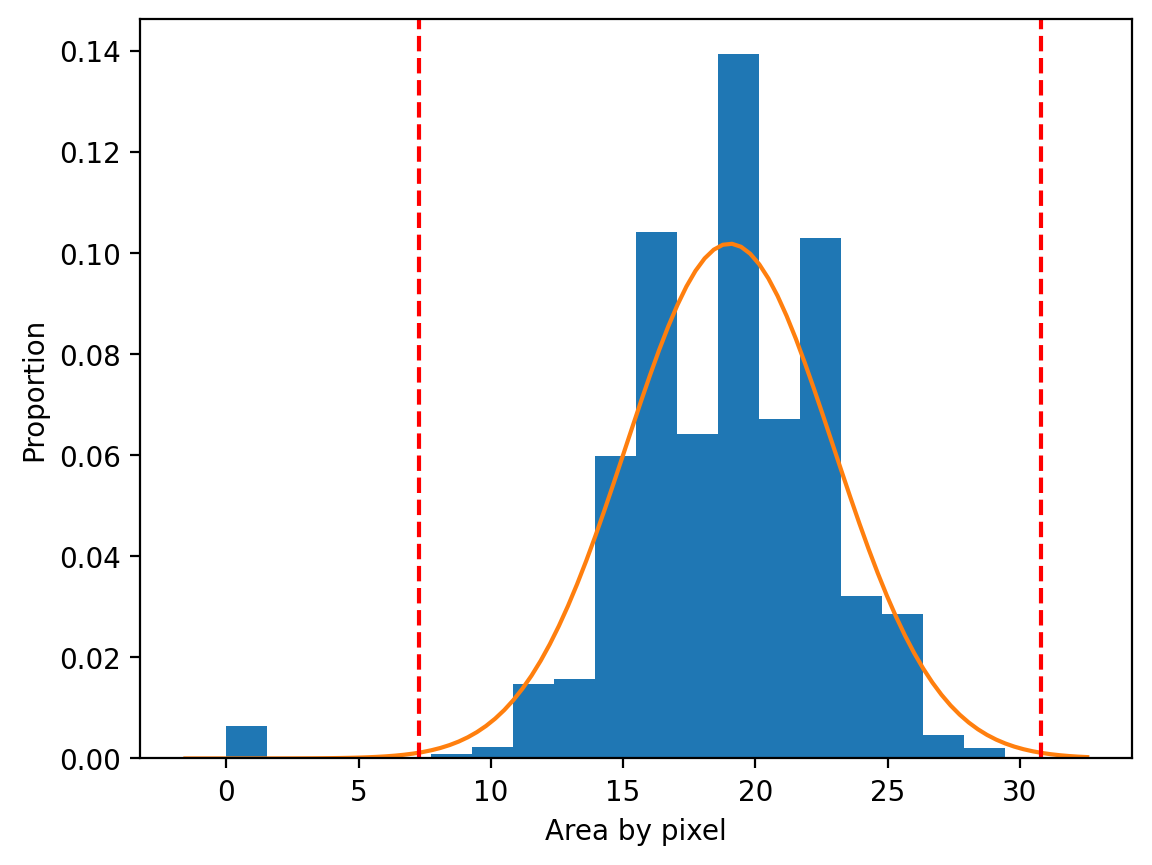

This task took 7.200276052951812 minutes


In [3]:
import time
#start time
start = time.time()

#image sources
#img_src = "/groups/CaiLab/personal/Lex/raw/020822_erna_dash_tf/notebook_pyfiles/pre_processed_images/HybCycle_0/MMStack_Pos0.ome.tif"
img_raw = '/groups/CaiLab/personal/Lex/raw/020822_erna_dash_tf/notebook_pyfiles/max_projected/HybCycle_0/MMStack_Pos0.ome.tif'

dots,pos = find_spots(img_raw, probability_threshold = 0.85, size_cutoff=3, pos=0)

print(f"This task took {(time.time() - start)/60} minutes")

In [4]:
pos

0

In [5]:
dots_ch = dots[dots["ch"]==1]


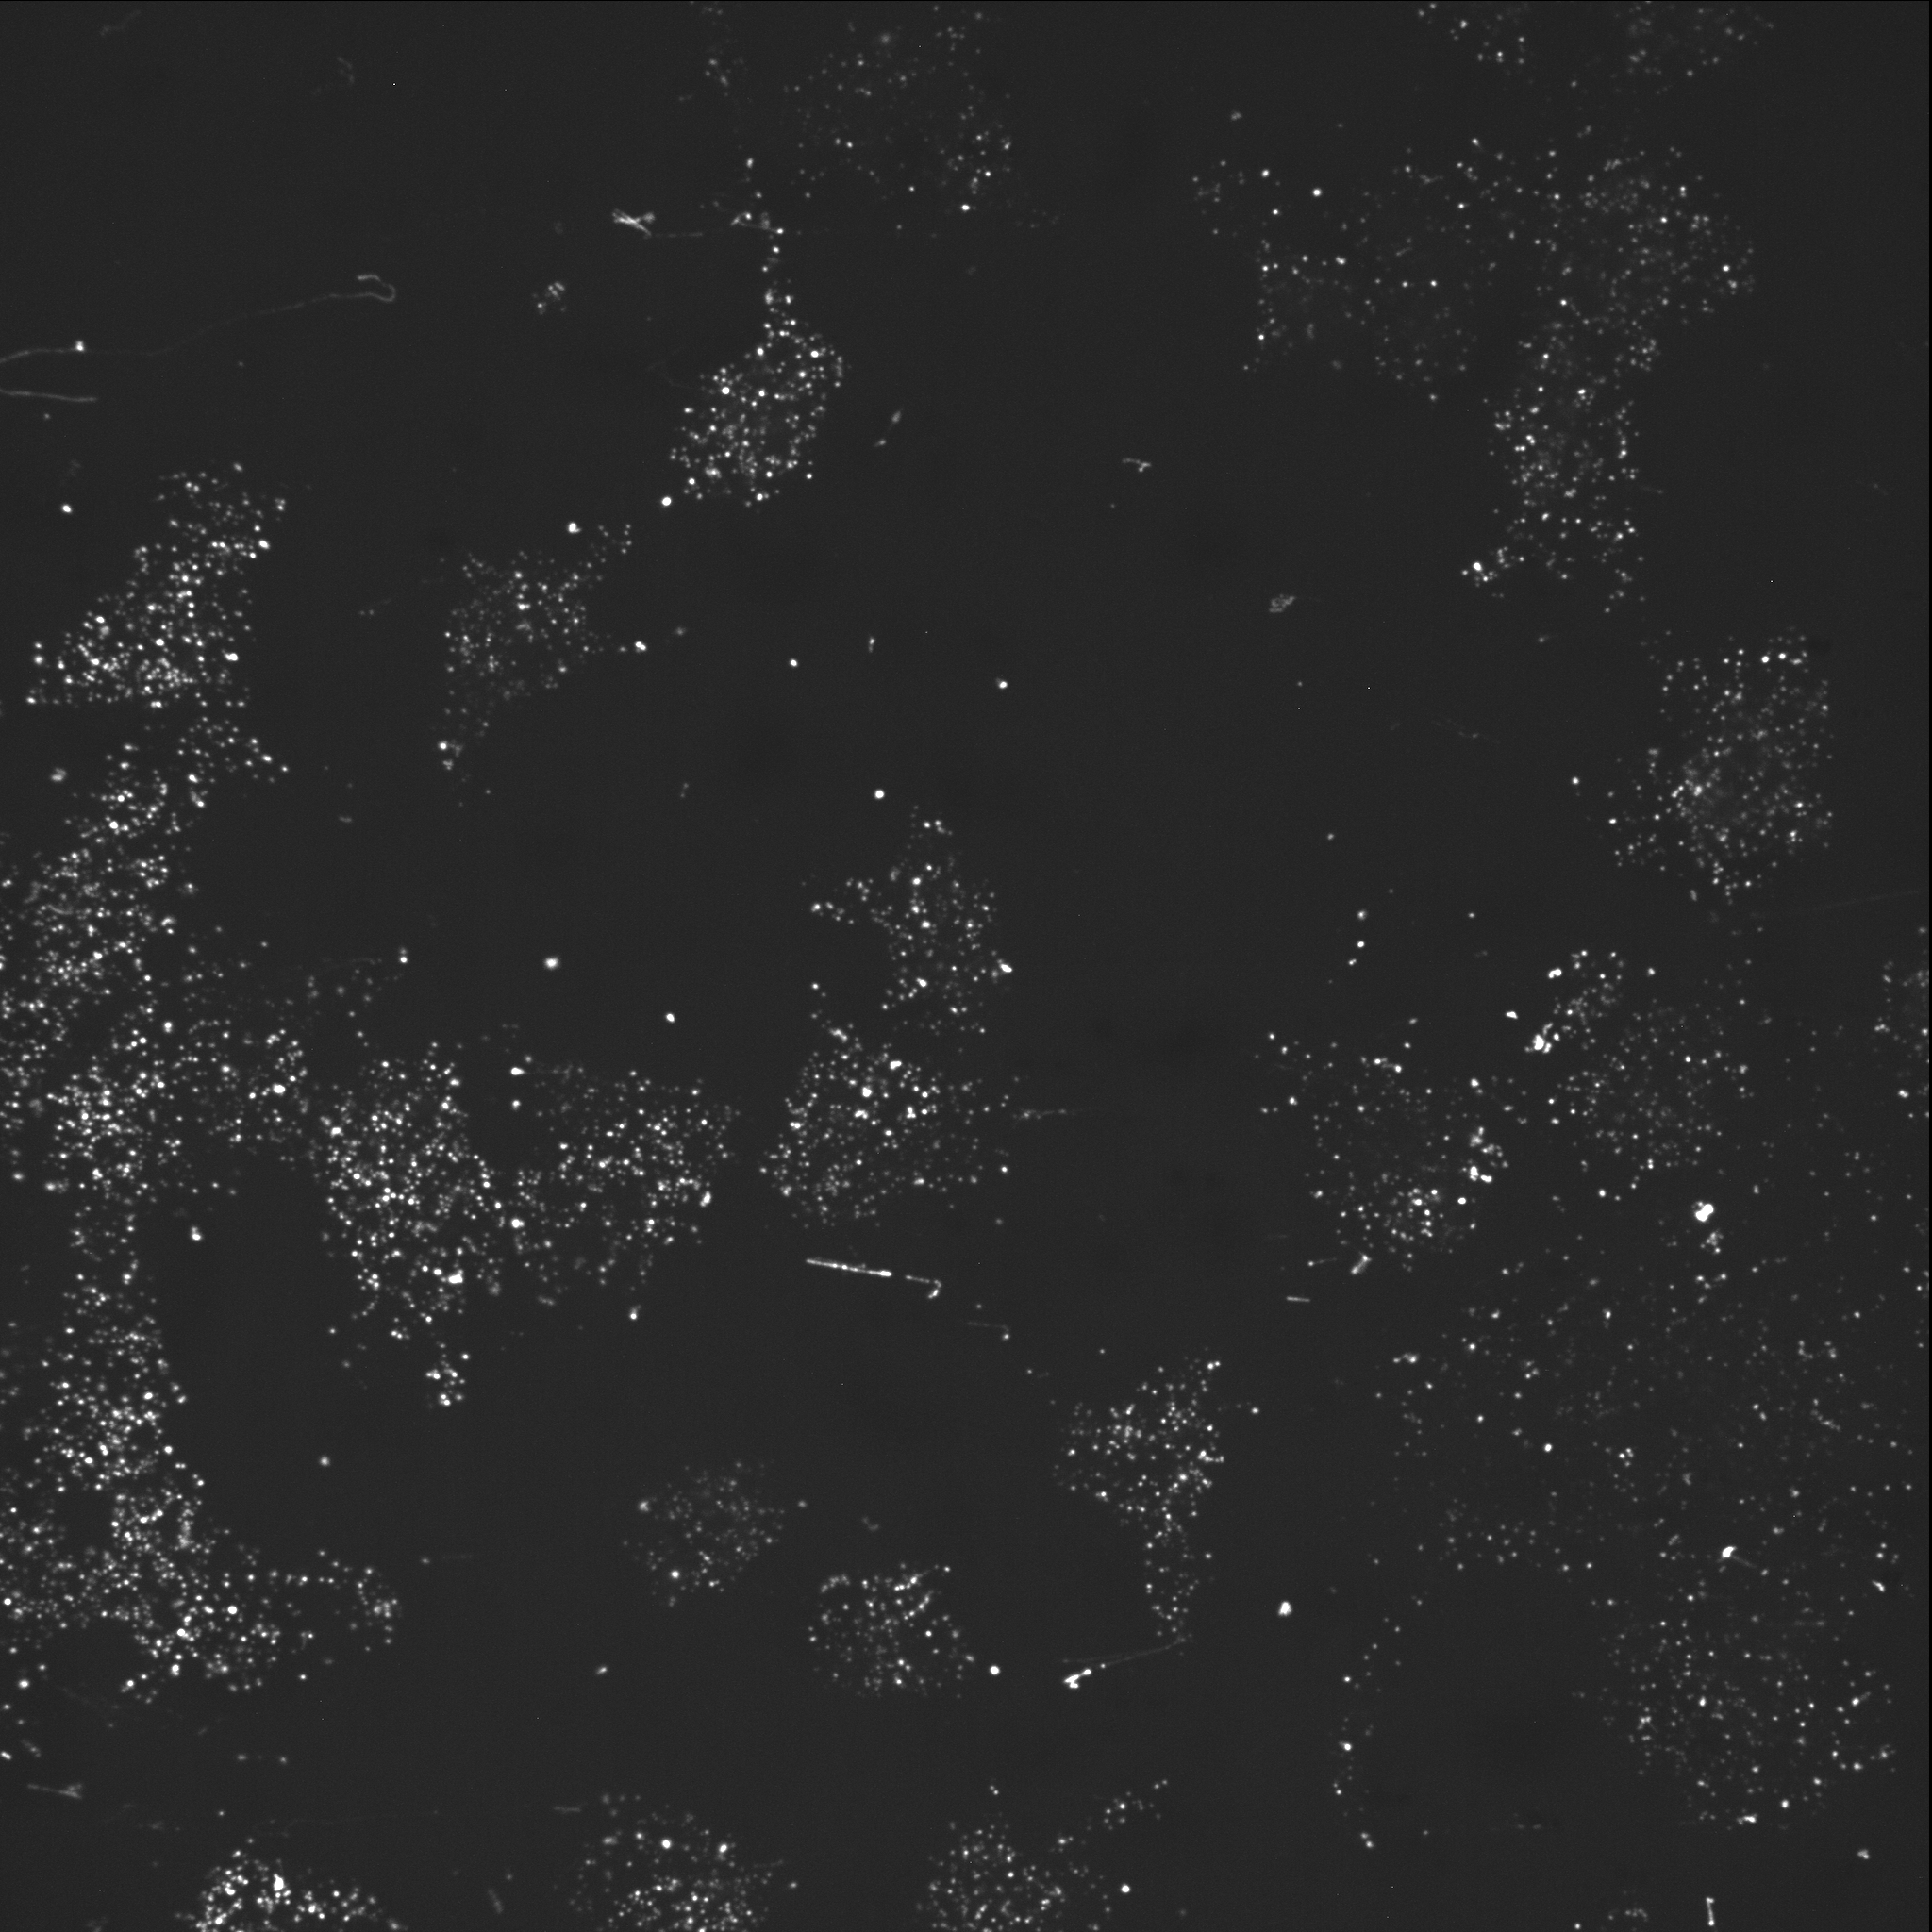

In [8]:
#img_raw = '/groups/CaiLab/personal/Lex/raw/020422_20kdash_3t3/notebook_pyfiles/aberration_corrected/HybCycle_0/MMStack_Pos0.ome.tif'
plot_3d_locs_on_2d_image(dots_ch,None, tiff=None, channel=0, raw_src = img_raw, 
                         raw_image = True, add_trace=False, zmax=1000)

In [7]:
# tiff = tf.imread(img_src)
# plot_3d_locs_on_2d_image(dots,None, tiff=tiff, channel=0, 
#                          raw_src = img_raw, raw_image = False,add_trace=False, zmax=1000)

# Check if there are weird dropouts in a certain hyb for each threshold

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#collect arrays
channel = 4
comb_dots_list = []
for i in range(11):
    path = f"/groups/CaiLab/personal/Lex/raw/112221_20kdash_3t3/notebook_pyfiles/dots_comb/Channel_{channel}/MMStack_Pos1/Threshold_{i}/Dot_Locations/locations_z_0.csv"
    arr1  = pd.read_csv(path)
    comb_dots_list.append(arr1)

In [ ]:
#counts total number of dots across hybs
final_counts = []
for df in comb_dots_list:
    dots_per_hyb = []
    for i in df["hyb"].unique():
        dots_per_hyb.append(len(df[df["hyb"]==i]))
    final_counts.append(dots_per_hyb)

In [ ]:
#generate subplot canvas
x = 4
fig, ax = plt.subplots(x, x, figsize=(8,10), sharex = True, constrained_layout=True)
fig.text(0.5, 0.2, 'HybCycles', ha='center')
fig.text(-0.03, 0.6, 'Total Counts', va='center', rotation='vertical')
i = 0

#fill subplots
for row in ax:
    for col in row:
        try:
            #generate scatter plot of gene
            col.bar(x=np.arange(1,len(final_counts[i])+1,1) ,height=final_counts[i])
            sns.despine()
            col.set_title(f"Threshold {i}")
        except IndexError:
            col.remove()
        i += 1
plt.show()

# Remove fiducials from locations files

In [1]:
#general analysis packages
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors

def colocalizing_dots(df1, df2, radius=1, return_dots_not_coloc=False):
    """
    Performs nearest neighbor search provided a given search radius.
    If the nearest neighbor has a euclidean pixel distance <= radius then the dots are colocalizing.
    Parameters
    ----------
    df1 = first set of dots
    df2 = second set of dots
    radius = search radius
    return_dots_not_coloc = bool to return dots not colocalizing
    """
    
    #reset index for df just in case
    df1 = df1.reset_index(drop=True)
    df2 = df2.reset_index(drop=True)
    
    #using sklearn nearest neighbor algorithm to find nearest dots
    #initialize algorithm
    neigh = NearestNeighbors(n_neighbors=2, radius=radius, metric="euclidean", n_jobs=1)
    
    #initialize neighbor
    initial_seed = df1[["x","y"]]
    #find neighbors for df1
    neigh.fit(df2[["x","y"]])
    distances,neighbors = neigh.radius_neighbors(initial_seed, radius, return_distance=True, sort_results=True)
    
    #nearest neighbor dot
    neighbors_flattened = []
    for i in range(len(neighbors)):
        try:
            neighbors_flattened.append([i,neighbors[i][0]])
        except IndexError:
            continue
            
    #keep dots that colocalize
    new_df1 = df1.iloc[np.array(neighbors_flattened)[:,0]].reset_index(drop=True)
    new_df2 = df2.iloc[np.array(neighbors_flattened)[:,1]].reset_index(drop=True)
    
    #colocalization efficiency
    eff = len(new_df1)/len(df1)
    
    print("colocalization efficiency =",np.round(eff, 2))
   
    if return_dots_not_coloc == True:
        #separate file for dots that do not colocalize
        df1_nocoloc_idx = np.array(list(set(df1.index)-set(np.array(neighbors_flattened)[:,0]))) 
        df1_nocoloc = df1.iloc[df1_nocoloc_idx].reset_index(drop=True)
        df2_nocoloc_idx = np.array(list(set(df2.index)-set(np.array(neighbors_flattened)[:,1])))
        df2_nocoloc = df2.iloc[df2_nocoloc_idx].reset_index(drop=True)
        
        return eff, [df1_nocoloc, df2_nocoloc]
    else:
        #return new dfs that do colocalize
        return eff, [new_df1, new_df2]

In [ ]:
#check data
dots = pd.read_csv("/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell/fiducials/Pos0/Channel_1/locations_z_0.csv")
dots = dots[dots["hyb"]==0]
dots = dots[dots["size"]>1]
dots_int = dots[dots["average intensity"] > 1000]

In [ ]:
import matplotlib.pyplot as plt
plt.hist(dots_ch["average intensity"], bins=100)
plt.xlim (0,15000)
plt.show()

In [ ]:
from pathlib import Path
#remove small size and low in fiducials
for pos in [0,1,2,3,4,5,6]:
    for ch in range(3):
        dots = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell/fiducials/Pos{pos}/Channel_{ch+1}/locations_z_0.csv")
        dots = dots[dots["size"]>1]
        dots_int = dots[dots["average intensity"] > 1000]
        outputpath = Path(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell/fiducials_filt/Pos{pos}/Channel_{ch+1}/locations_z_0.csv")
        outputpath.parent.mkdir(parents=True, exist_ok=True)
        dots_int.to_csv(str(outputpath))

In [ ]:
#read in all bead locations
beads_list = []
for pos in [0,1,2,3,4,5,6]:
    for ch in range(3):
        dots = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell/fiducials_filt/Pos{pos}/Channel_{ch+1}/locations_z_0.csv")
        beads_list.append(dots)

In [ ]:
#read in locations files for barcodes
barcode_list = []
for pos in [0,1,2,3,4,5,6]:
    for ch in range(3):
        dots = pd.read_csv(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell/Pos_{pos}/Channel_{ch+1}/locations_z_0.csv")
        barcode_list.append(dots)

In [ ]:
#remove fiducials from df
fid_rem = []
for i in range(len(beads_list)):
    df_list = []
    for hyb in range(80):
        _, df = clocationsolocalizing_dots(beads_list[i], barcode_list[i][barcode_list[i]["hyb"]==hyb], 
                                  radius=1, return_dots_not_coloc=True)
        fin_df = df[1][["hyb", "ch", "x", "y", "z", "size", "peak intensity", "average intensity"]]
        df_list.append(fin_df)
    new_df = pd.concat(df_list)
    fid_rem.append(new_df)

In [ ]:
#write out files
pos = 0
ch = 0
for i in range(len(fid_rem)):
    if (i % 3 != 0) or (i == 0):
        path = Path(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell_fid_rem/Pos_{pos}/Channel_{ch+1}/locations_z_0.csv")
        path.parent.mkdir(parents=True, exist_ok=True)
        fid_rem[i].to_csv(str(path))
        ch += 1
    else:
        pos += 1
        ch = 0
        path = Path(f"/groups/CaiLab/personal/Lex/raw/Linus_10k_cleared_080918_NIH3T3/notebook_pyfiles/dots_detected/deepcell_fid_rem/Pos_{pos}/Channel_{ch+1}/locations_z_0.csv")
        path.parent.mkdir(parents=True, exist_ok=True)
        fid_rem[i].to_csv(str(path))
        ch += 1